### Arunjith PM

# Business Case: Aerofit - Descriptive Statistics & Probability


The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


## Problem statement

1. Analyse the product sales of each product
2. How Fitness levels attained by each Products
3. Products sales among genters
4. How coustemers plan to use products 
5. How Usage per week of each products varies
6. How Fitness levels achived by  each products 
7. Distribution of Quantitive data
8. Product purchased by Martialstatus 
9. Explain correlations amoung our quantitative data
10. Compare mean and median of quantitative values and detecting outlayer values
11. Find the relationship between Miles running vs Aerofit priferance
12. Find the relationship between Miles running vs fitness
13. Find the relationship between usage vs fitness for each products
14. Usage vs miles with diffrent fitness levels
15. Find the Probability of Fitness for each usage per week
16. Relation between Usage per week and fitness on the basis of MaritalStatus
17. Find Relation between Income and Aerofit priferance
18. Probabilty of each product based on Income
19. marginal probability of purchase w.r.t salary
20. Education vs miles running
21. MaritalStatus vs Age preferance of each product
22. Probability of buying products w.r.t Age
23. Probability of each products for single users
24. Probability of each products for partnered users
25. Find the Expected price of 100 products selling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [264]:
#length of data
len(df)

180

In [265]:
#checking datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [266]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [102]:
#number of unique values in our data
for i in df.columns:
  print('unique',i,':',df[i].unique())

unique Product : ['KP281' 'KP481' 'KP781']
unique Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
unique Gender : ['Male' 'Female']
unique Education : [14 15 12 13 16 18 20 21]
unique MaritalStatus : ['Single' 'Partnered']
unique Usage : [3 2 4 5 6 7]
unique Fitness : [4 3 2 1 5]
unique Income : [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
unique Miles : [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [11]:
#checking null values in every column of our data
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [14]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Univariate Analysis in terms of counts of each column

### Products sales 

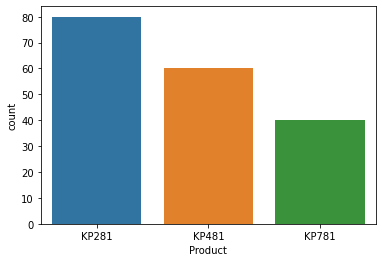

In [300]:
sns.countplot(x = 'Product', data = df)
plt.show()

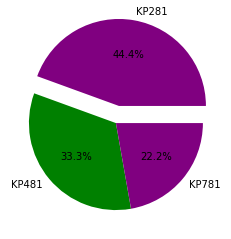

In [307]:
x=df.groupby(['Product']).agg({"Gender":"count"}).reset_index()
plt.pie(x['Gender'],explode=(0.2,0,0), labels=x['Product'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

#### > KP281 is the most selling product
#### > KP781 is the least selling product

### Fitness levels attained by each Products

In [112]:
#number of distinct fitness on the basis of Product
x=df.groupby(['Product']).agg({"Fitness":"nunique"}).sort_values(by=['Fitness'], ascending=False).reset_index()
x

,Product,Fitness
0,KP281,5
1,KP481,4
2,KP781,3


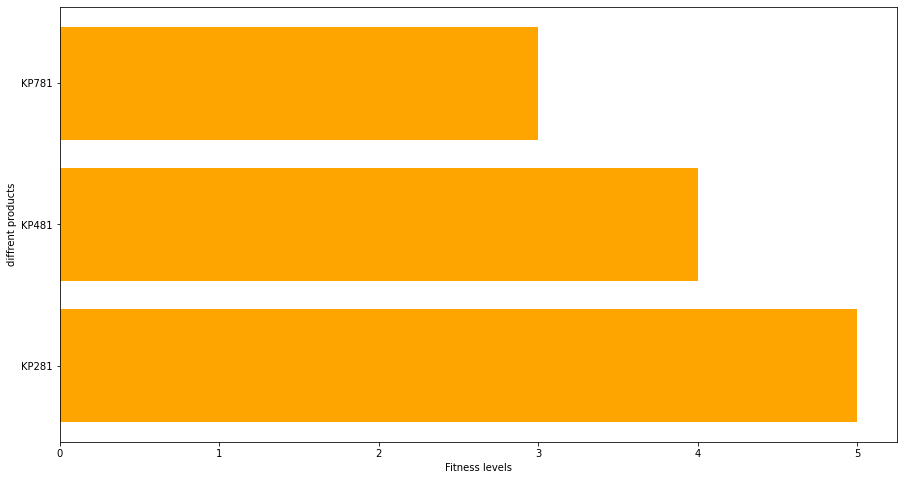

In [113]:
plt.figure(figsize=(15,8))
plt.barh( x['Product'],x['Fitness'],color=['orange'])
plt.xlabel('Fitness levels')
plt.ylabel('diffrent products')
plt.show()

#### >All fitness levels attained by products KP281
#### >3 fitness levels attained by products KP781

### Products sales among genters

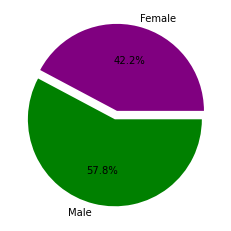

In [282]:
x=df.groupby(['Gender']).agg({"Product":"count"}).reset_index()
plt.pie(x['Product'],explode=(0.05,0.05), labels=x['Gender'],colors=['purple','green'],autopct='%.1f%%')
plt.show()


#### >We have 57:43 ratio of Movies and TV Shows in our data

### Usage per week of coustemers

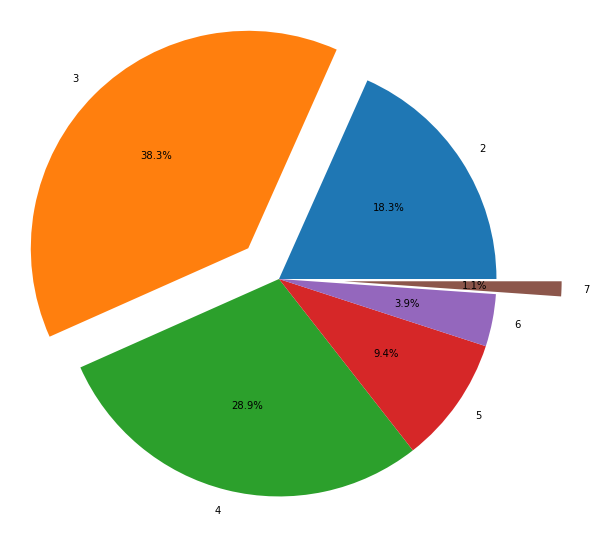

In [114]:
plt.figure(figsize=(10,10))
x=df.groupby(['Usage']).agg({"Product":"count"}).reset_index()
plt.pie(x['Product'],explode=(0,0.2,0,0,0,0.3), labels=x['Usage'],autopct='%.1f%%')
plt.show()

#### >most of the people(38%) plan to use product 3 times a week 
#### >only few people 1% are plan to use our product 7 times a week

### Usage per week of each products 

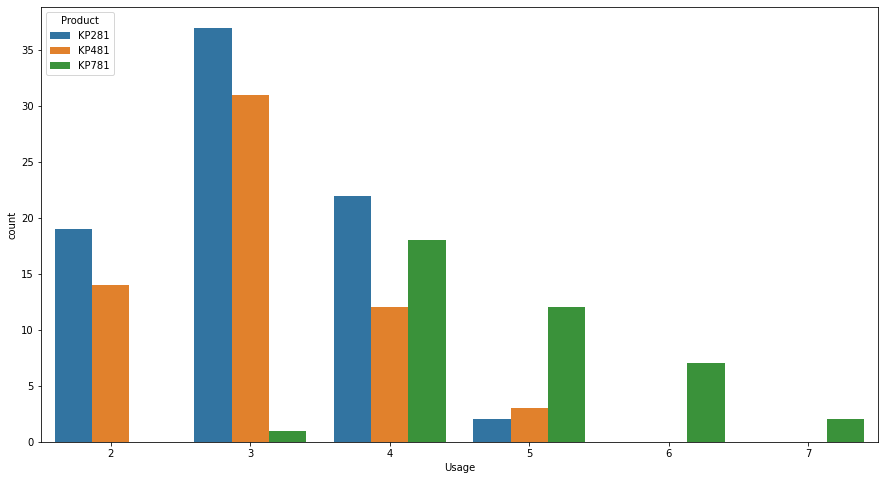

In [103]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Usage', data = df1,hue='Product')
plt.show()

#### > Most of the people are using the products 3 times a week
#### > It is mainly used by KP281

### Fitness levels achived by  each products 

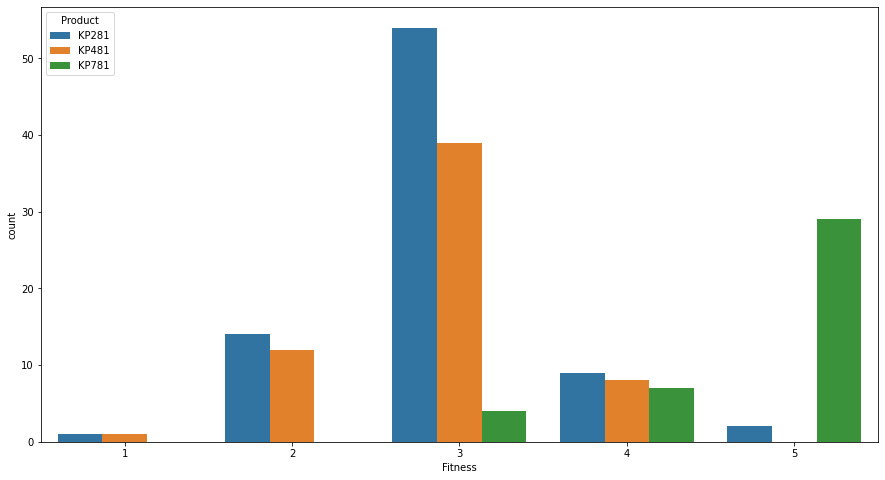

In [105]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Fitness', data = df1,hue='Product')
plt.show()

#### >  Most of the people are attain fitness level 3
#### > By using machine KP281

### Distribution of Quantitive data

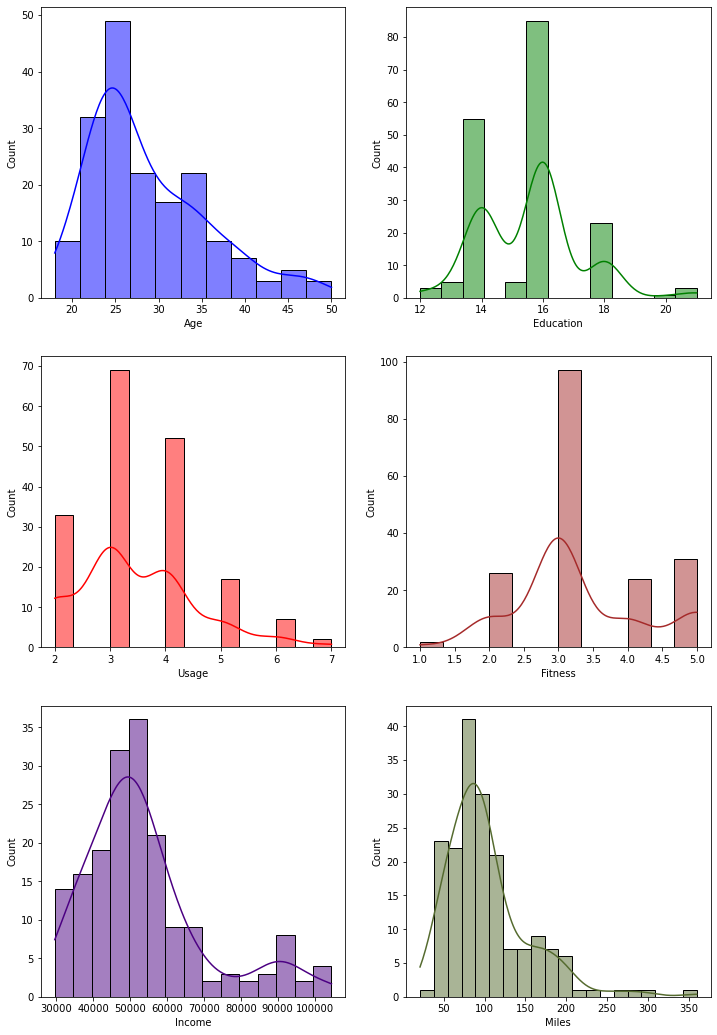

In [106]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="Age", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True,color="indigo", ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True,color="darkolivegreen", ax=axis[2,1])
plt.show()

#### > our product is used in between 18 to 45 years old people, most of them are in 25 year old
#### > around avarage educated people are mostly using our product,for low educated and high educated only few are using our product
#### > around 30k to 6k salary people are our main users
#### > almost all users runs in between 50 to 125 miles per week


###  Product purchased by Martialstatus 

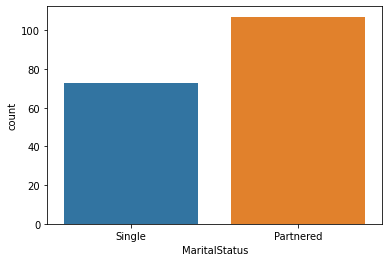

In [299]:
sns.countplot(x = 'MaritalStatus', data = df)
plt.show()

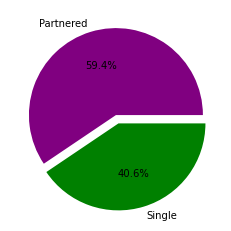

In [310]:
x=df.groupby(['MaritalStatus']).agg({"Gender":"count"}).reset_index()
plt.pie(x['Gender'],explode=(0,0.1), labels=x['MaritalStatus'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

#### > most of the coustemers are partnered user

### correlations

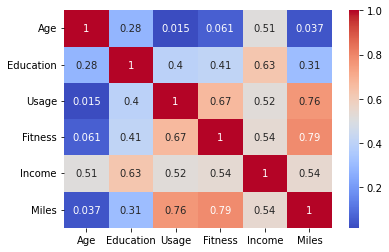

In [59]:
sns.heatmap(df.corr(), cmap= "coolwarm", annot=True)
plt.show()

#### > Fitness increses with Usage per week and Avrage miles running per week
#### > With increse in income Avrage miles running per week increse, High income people are more focus on healthy
#### > Also increse in Education Avrage miles running per week increse, High educated people are more focus on healthy
#### > Age does not have any linear reationship with usage fitness and miles running.

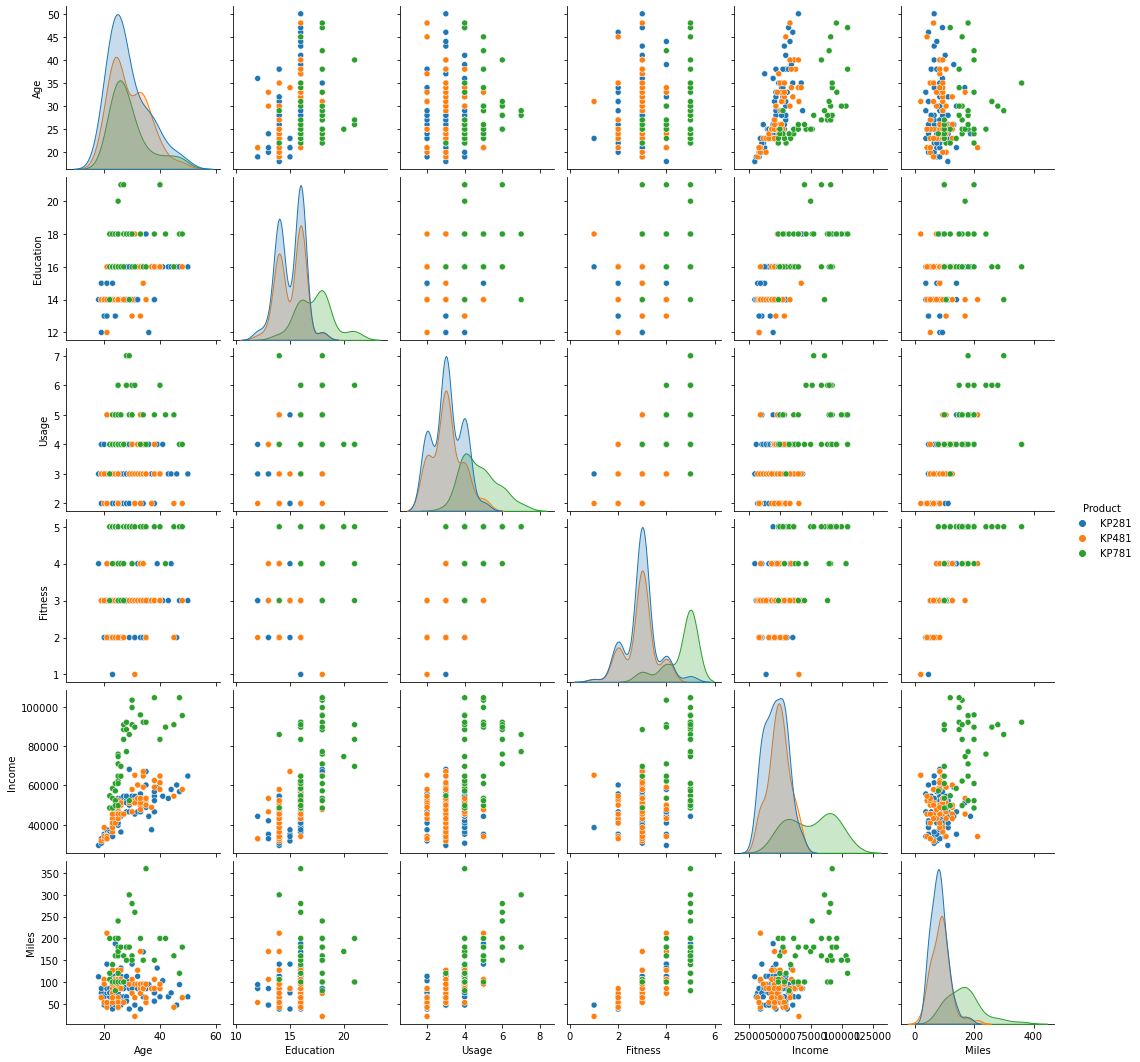

In [60]:
sns.pairplot(data = df, hue= 'Product')
plt.show()

### detecting outlayer values

In [55]:
ds=df[['Age','Education','Usage','Fitness','Income','Miles']]
ds

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [56]:
for i in ds.columns:
    print('median of ',i,'=',ds[i].median())

median of  Age = 26.0
median of  Education = 16.0
median of  Usage = 3.0
median of  Fitness = 3.0
median of  Income = 50596.5
median of  Miles = 94.0


In [159]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### >Here we can see that mean and median of Age,Education,Usage,Fitness,Income are almost same
#### >mean and median of Miles is more deviation, So we need to romove outlayer value of the miles

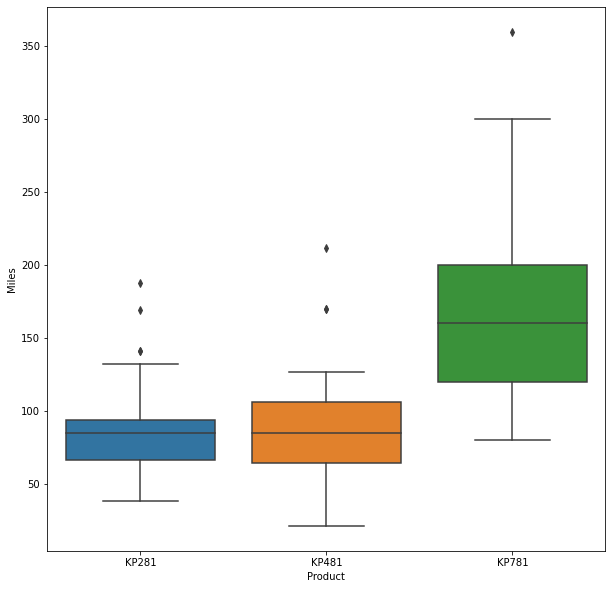

In [160]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Product', y = 'Miles', data = df)
plt.show()

#### >all three products have outer values

In [64]:
KP281=df[df['Product']=='KP281']
KP281

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


In [69]:
p_25=KP281['Miles'].quantile(.25)
p_25

66.0

In [70]:
p_75=KP281['Miles'].quantile(.75)
p_75

94.0

In [71]:
iqr=p_75-p_25
iqr

28.0

In [72]:
lower=p_25-(1.5*iqr)
upper=p_75+(1.5*iqr)
print(lower)
print(upper)

24.0
136.0


In [77]:
KP281[(KP281['Miles']<lower)|(KP281['Miles']>upper)].Miles

8     141
23    188
53    141
61    169
Name: Miles, dtype: int64

#### >Outlayer values of machine KP281 are  141,188,141,169 

In [73]:
a1=KP281[(KP281['Miles']>lower) & (KP281['Miles']<upper)]

In [79]:
KP481=df[df['Product']=='KP481']
KP481

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53
87,KP481,23,Male,14,Partnered,3,3,36384,95
88,KP481,23,Male,14,Partnered,3,3,38658,85
89,KP481,23,Female,16,Single,3,3,45480,95


In [80]:
p_25=KP481['Miles'].quantile(.25)
p_25

64.0

In [81]:
p_75=KP481['Miles'].quantile(.75)
p_75

106.0

In [82]:
iqr=p_75-p_25
iqr

42.0

In [83]:
lower=p_25-(1.5*iqr)
upper=p_75+(1.5*iqr)
print(lower)
print(upper)

1.0
169.0


In [85]:
KP481[(KP481['Miles']<lower)|(KP481['Miles']>upper)].Miles

84     212
103    170
120    170
Name: Miles, dtype: int64

#### >Outlayer values of machine KP481 are  212,170,170

In [86]:
a2=KP481[(KP481['Miles']>lower) & (KP481['Miles']<upper)]

In [87]:
KP781=df[df['Product']=='KP781']
KP781

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100
145,KP781,23,Male,16,Single,4,5,48556,100
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
148,KP781,24,Female,16,Single,5,5,52291,200
149,KP781,24,Male,16,Single,5,5,49801,160


In [88]:
p_25=KP781['Miles'].quantile(.25)
p_25

120.0

In [89]:
p_75=KP781['Miles'].quantile(.75)
p_75

200.0

In [90]:
iqr=p_75-p_25
iqr

80.0

In [91]:
lower=p_25-(1.5*iqr)
upper=p_75+(1.5*iqr)
print(lower)
print(upper)

0.0
320.0


In [92]:
KP781[(KP781['Miles']<lower)|(KP781['Miles']>upper)].Miles

173    360
Name: Miles, dtype: int64

#### >Outlayer values of machine KP781 is  360 

In [188]:
a3=KP781[(KP781['Miles']>lower) & (KP781['Miles']<upper)]

In [189]:
pdList = [a1,a2,a3]  # List of your dataframes
da = pd.concat(pdList).reset_index()
da

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...,...
167,175,KP781,40,Male,21,Single,6,5,83416,200
168,176,KP781,42,Male,18,Single,5,4,89641,200
169,177,KP781,45,Male,16,Single,5,5,90886,160
170,178,KP781,47,Male,18,Partnered,4,5,104581,120


#### outlayer removed dataset

###  Miles running vs Aerofit priferance

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


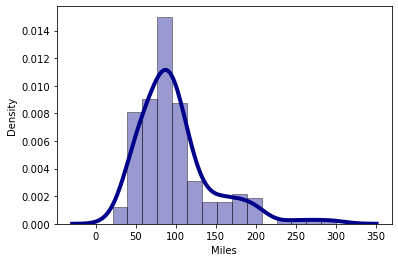

In [216]:
import seaborn as sns
sns.distplot(da['Miles'], hist=True, kde=True, 
bins=int(15), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

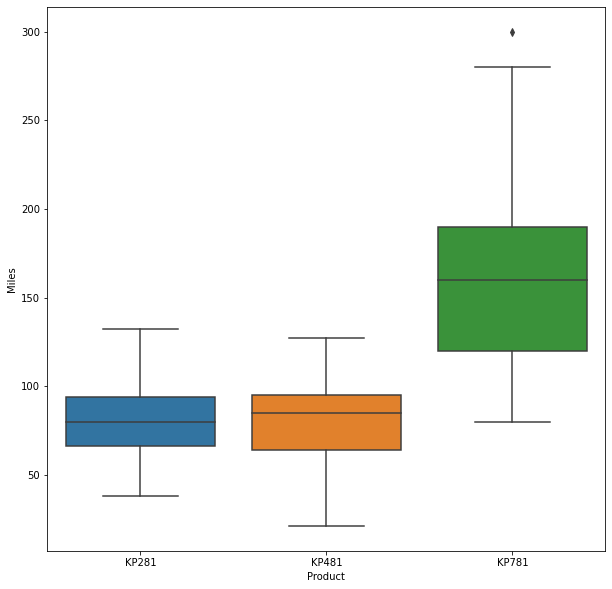

In [191]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Product', y = 'Miles', data = da)
plt.show()

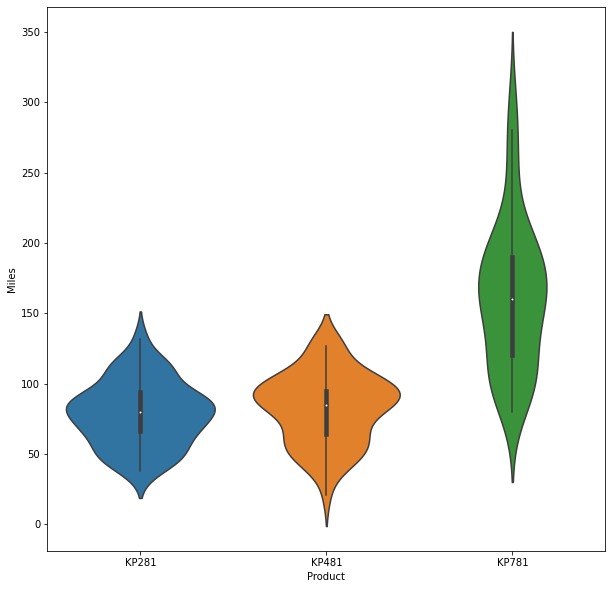

In [215]:
plt.figure(figsize=(10,10))
sns.violinplot(x = 'Product', y = 'Miles', data = da)
plt.show()

- for low and  medium (50 to 140 miles per week) users prefers machines KP281,KP481
- for hevy users(20 to 270 miles per week)  prefered machine is KP781
- for gym purpuse KP781 is better

### Miles vs fitness

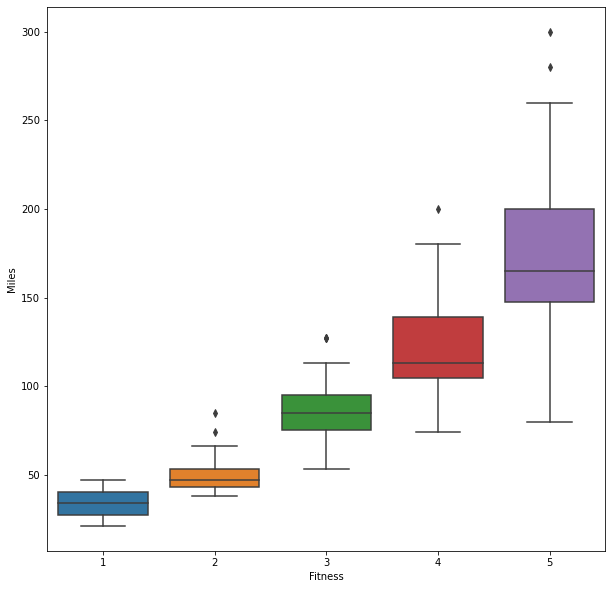

In [224]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Fitness', y = 'Miles', data = da)
plt.show()

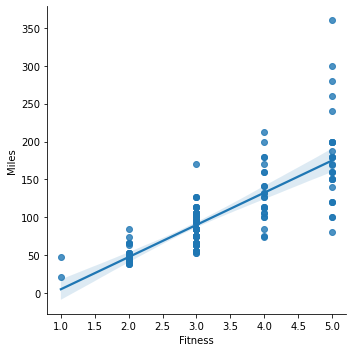

In [222]:
sns.lmplot(y = 'Miles', x= 'Fitness', data = df)
plt.show()

#### >Here we can see more miles running people have more fitness level
#### >people with high fitness level of 5 are running around 75 to 250 miles per week
#### >people with low fitness level of 1 are running below 50 miles per week

### usage vs fitness for each products

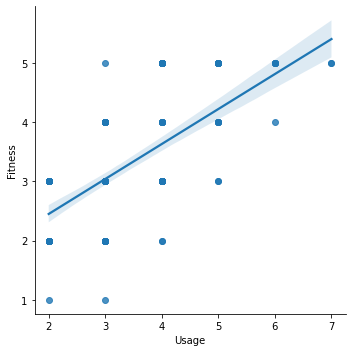

In [205]:
sns.lmplot(x = 'Usage', y= 'Fitness', data = df)
plt.show()

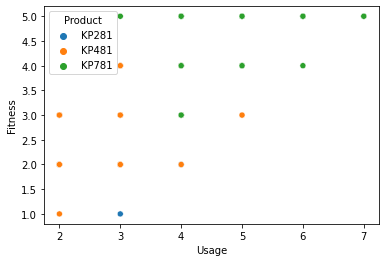

In [226]:
sns.scatterplot(x= df['Usage'], y = df['Fitness'],data=df,hue='Product')
plt.show()

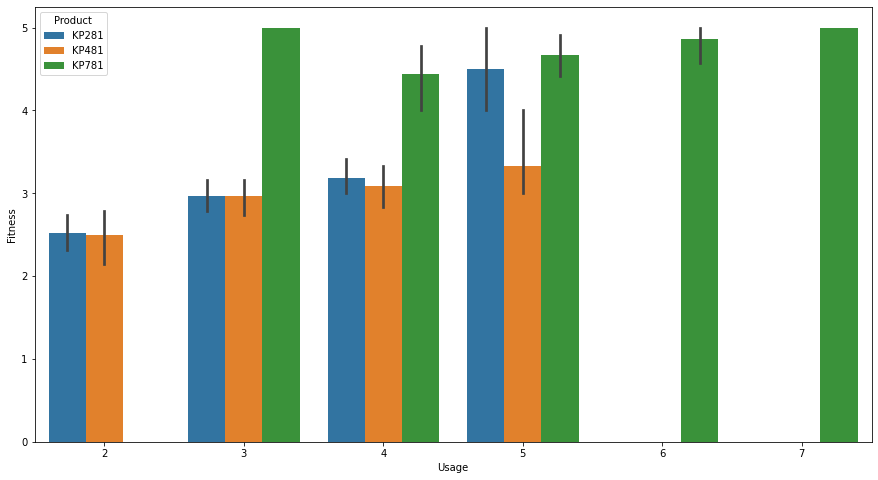

In [101]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Usage', y = 'Fitness', data=df, estimator=np.mean, hue = 'Product')
plt.show()

#### >Fitness increses with increse in usage
#### >high usage people are using KP781 and they have high fitness

### Usage vs miles with diffrent fitness levels

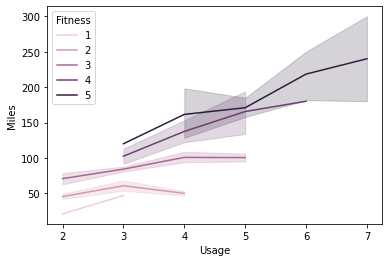

In [119]:
sns.lineplot(x= 'Usage', y= 'Miles', data = df, hue='Fitness')
plt.show()

#### Fitness level 5 is attained by using 3 to 7 times a week and running 125  to 250 miles 
#### Low fitness level of 1 is attained byusage per week  less than 3 times and running less than 50 miles

### Probability of Fitness for each usage per week

In [253]:
s=pd.crosstab(df.Usage,df.Fitness,margins=True).reset_index()
s.set_index('Usage',inplace=True)
s['P(good fitness/Usage lvl)']=(s[4]+s[5])/s['All']
s['P(medium fitness/Usage lvl)']=(s[3])/s['All']
s['P(low fitness/Usage lvl)']=(s[1]+s[2])/s['All']
s.head(6)

Fitness,1,2,3,4,5,All,P(good fitness/Usage lvl),P(medium fitness/Usage lvl),P(low fitness/Usage lvl)
Usage,,,,,,,,,
2,1,14,18,0,0,33,0.000000,0.545455,0.454545
3,1,10,47,10,1,69,0.159420,0.681159,0.159420
4,0,2,30,7,13,52,0.384615,0.576923,0.038462
5,0,0,2,6,9,17,0.882353,0.117647,0.000000
6,0,0,0,1,6,7,1.000000,0.000000,0.000000
7,0,0,0,0,2,2,1.000000,0.000000,0.000000


#### > Probability of good finess given that usage level 6&7 is 1, which means all hevy users are in good fitness, also usage level 5 have higher probability of good fitness.Probability of good finess given that usage level low is 0, No low users are in good fitness
#### >For usage level 2,3&4 have higher probability of low and medium fitness

### Relation between Usage per week and fitness on the basis of MaritalStatus

In [201]:
dx=df.groupby(['MaritalStatus','Usage'])['Fitness'].mean().to_frame('avrage fitness').reset_index()
dx

,MaritalStatus,Usage,avrage fitness
0,Partnered,2,2.545455
1,Partnered,3,2.850000
2,Partnered,4,3.724138
3,Partnered,5,4.222222
4,Partnered,6,4.800000
5,Partnered,7,5.000000
6,Single,2,2.454545
7,Single,3,3.206897
8,Single,4,3.434783
9,Single,5,4.625000


In [203]:
dx.corr()

,Usage,avrage fitness
Usage,1.000000,0.975386
avrage fitness,0.975386,1.000000


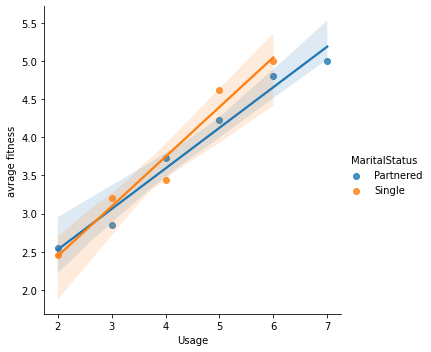

In [204]:
sns.lmplot(x= 'Usage', y= 'avrage fitness', data = dx,hue='MaritalStatus')
plt.show()

#### >partnerd users have less fitness with increse in usage w.r.t single users, becouse in partnered usage shows for both of the partners

###  Income vs Aerofit priferance

In [18]:
df1=df.copy()

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


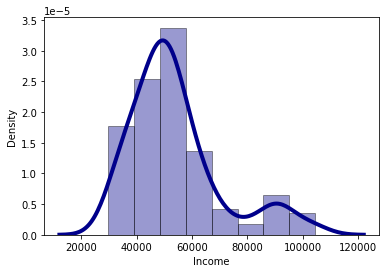

In [19]:

sns.distplot(df1['Income'], hist=True, kde=True, 
bins=int(8), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

#### > most of the coustemers are in  medium salary range of 40k-60k

### Probabilty of each product based on Income

In [5]:
df1=df.copy()

In [6]:
bins1 = [25000,45000,75000,105000]
labels1 = ['25k-45k low income','35k-75k medium income','75-105k high income']
df1['income'] = pd.cut(df1['Income'],bins=bins1,labels=labels1)
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income
0,KP281,18,Male,14,Single,3,4,29562,112,25k-45k low income
1,KP281,19,Male,15,Single,2,3,31836,75,25k-45k low income
2,KP281,19,Female,14,Partnered,4,3,30699,66,25k-45k low income
3,KP281,19,Male,12,Single,3,3,32973,85,25k-45k low income
4,KP281,20,Male,13,Partnered,4,2,35247,47,25k-45k low income


In [213]:
d=pd.crosstab(df1.income,df1.Product,margins=True).reset_index()
d['P(KP281/Income)']=d['KP281']/d['All']
d['P(KP481/Income)']=d['KP481']/d['All']
d['P(KP781/Income)']=d['KP781']/d['All']
d

Product,income,KP281,KP481,KP781,All,P(KP281/Income),P(KP481/Income),P(KP781/Income)
0,25k-45k low income,34,15,0,49,0.693878,0.306122,0.000000
1,35k-75k medium income,46,45,19,110,0.418182,0.409091,0.172727
2,75-105k high income,0,0,21,21,0.000000,0.000000,1.000000
3,All,80,60,40,180,0.444444,0.333333,0.222222


- For high income coustemers probability of buying KP781 is 1, all of them prefering advanced features
- For medium income coustemers probability of buying KP481 and KP281 are almost same
- For low income coustemers probability of buying KP281 is high

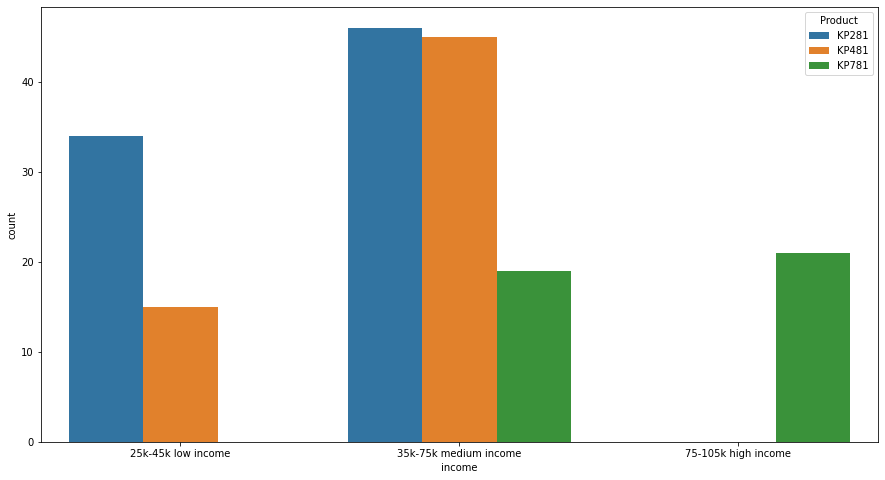

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'income', data = df1,hue='Product')
plt.show()

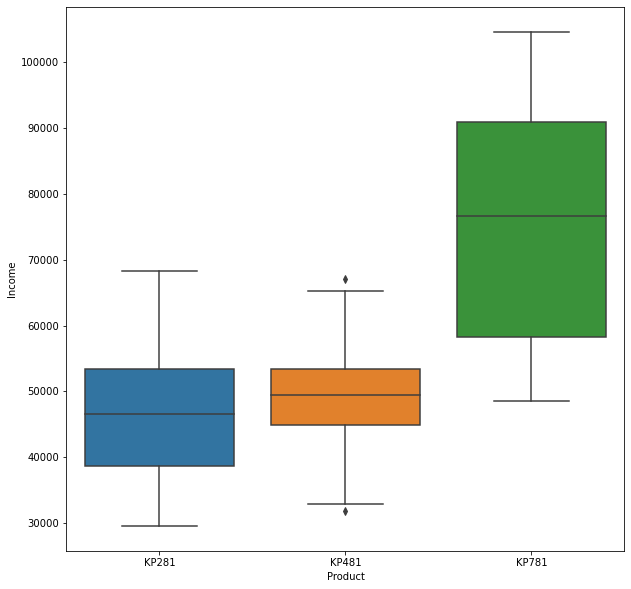

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Product', y = 'Income', data = df1)
plt.show()

#### >For high income coustemers prefering advanced features, so the buys KP781
#### >For low and medium income coustemers prefering KP281 and KP481

### marginal probability of purchase w.r.t salary

<AxesSubplot:ylabel='income'>

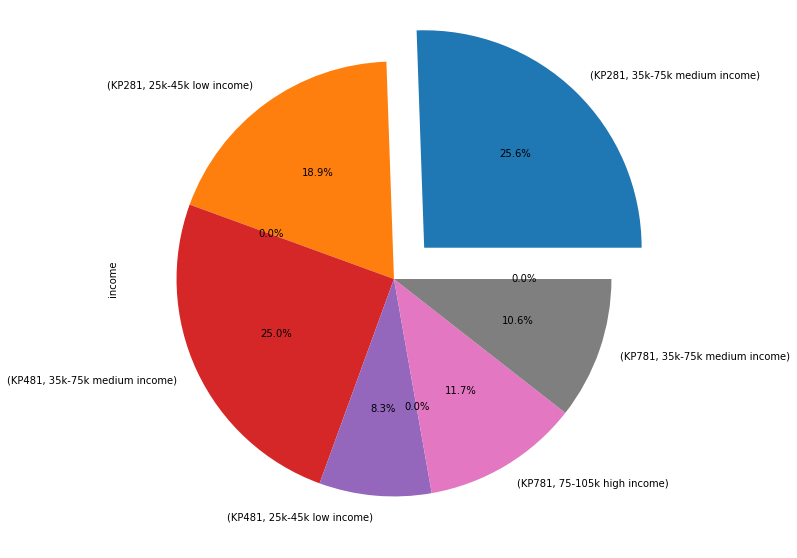

In [53]:
plt.figure(figsize=(10,10))
df1.groupby('Product')['income'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.2,0,0,0,0,0,0,0,0))

#### > Medium salary range who buys KP281 are have more probability of 25.6%
#### > Second one is Medium salary range who buys KP481 KP481 with probability of 25%


### Education vs miles running

In [94]:
d=df.groupby(['Education','Product'])['Miles'].mean().to_frame('miles').reset_index()
d

,Education,Product,miles
0,12,KP281,89.500000
1,12,KP481,53.000000
2,13,KP281,59.666667
3,13,KP481,138.000000
4,14,KP281,80.200000
5,14,KP481,93.521739
6,14,KP781,203.000000
7,15,KP281,84.750000
8,15,KP481,85.000000
9,16,KP281,85.897436


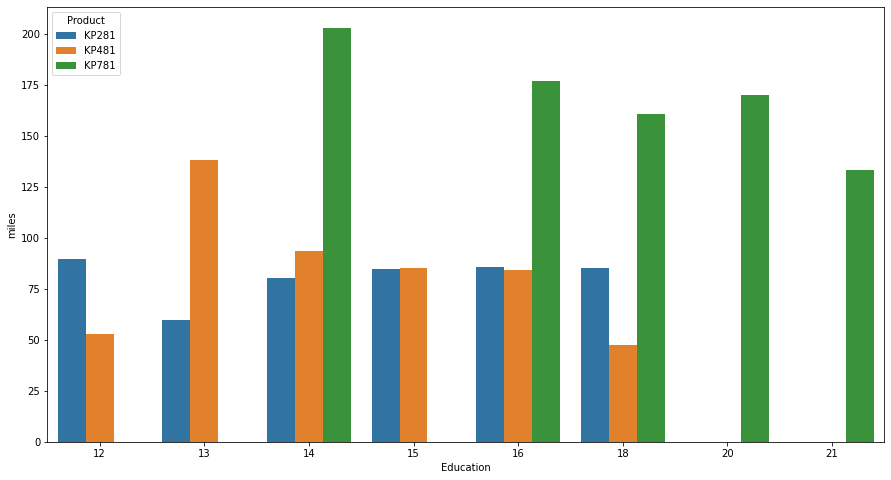

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Education', y = 'miles', data=d, estimator=np.mean, hue = 'Product')
plt.show()

 - #### More educated people are using KP781

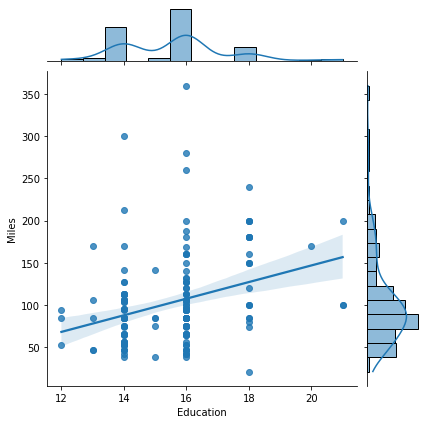

In [57]:
sns.jointplot(x= 'Education', y = 'Miles', data= df, kind='reg')
plt.xlabel('Education')
plt.ylabel('Avrage Miles running')
plt.show()

#### > More educated people are more average miles running, they are giving more imortance to fitness and being healthy

### MaritalStatus vs Age preferance of each product

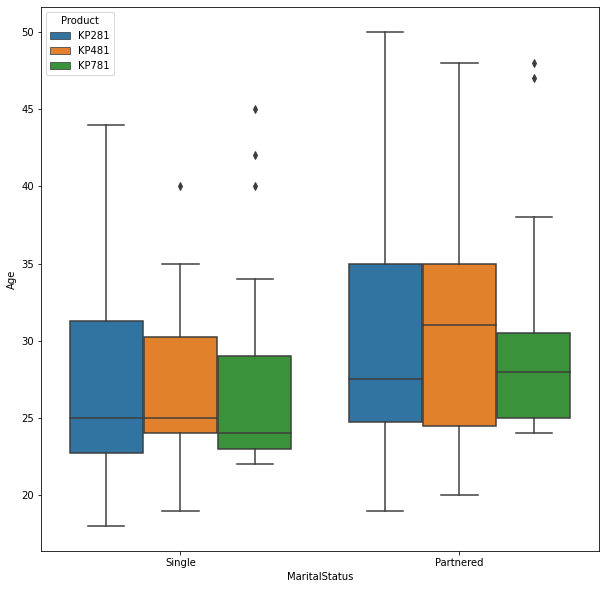

In [61]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'MaritalStatus', y = 'Age', data = df,hue='Product')
plt.show()

#### > Partnered user have more median age than single users


### Probability of buying products w.r.t Age

In [9]:
bins1 = [17,25,35,45,55]
labels1 = ['18-25','25-35','35-45','45-55']
df1['age'] = pd.cut(df1['Age'],bins=bins1,labels=labels1)
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income,age
0,KP281,18,Male,14,Single,3,4,29562,112,25k-45k low income,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,25k-45k low income,18-25
2,KP281,19,Female,14,Partnered,4,3,30699,66,25k-45k low income,18-25
3,KP281,19,Male,12,Single,3,3,32973,85,25k-45k low income,18-25
4,KP281,20,Male,13,Partnered,4,2,35247,47,25k-45k low income,18-25
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,75-105k high income,35-45
176,KP781,42,Male,18,Single,5,4,89641,200,75-105k high income,35-45
177,KP781,45,Male,16,Single,5,5,90886,160,75-105k high income,35-45
178,KP781,47,Male,18,Partnered,4,5,104581,120,75-105k high income,45-55


In [18]:
x=pd.crosstab(df1.age,df1.Product,margins=True).reset_index()
x['(KP281/Age)']=x['KP281']/x['All']
x['(KP481/Age)']=x['KP481']/x['All']
x['(KP781/Age)']=x['KP781']/x['All']
x.head(4)

Product,age,KP281,KP481,KP781,All,(KP281/Age),(KP481/Age),(KP781/Age)
0,18-25,34,28,17,79,0.430380,0.354430,0.215190
1,25-35,32,24,17,73,0.438356,0.328767,0.232877
2,35-45,11,7,4,22,0.500000,0.318182,0.181818
3,45-55,3,1,2,6,0.500000,0.166667,0.333333


#### > we can see probability of KP281 given perticular age is almost same, So all aged people are equally prefers KP281
#### > we can see probability of KP481 given perticular age  18 to 35 is almost same,and less in older people(45-55)
#### > probability of KP781 given perticular age  18 to 35 is almost same,little higher for older people(45-55)

### Probability of each products for single users

In [330]:
x=df.groupby(['MaritalStatus','Gender','Product'])['Product'].count().to_frame('count').reset_index()
partnered=x.head(6)
single=x.tail(6)
single

,MaritalStatus,Gender,Product,count
6,Single,Female,KP281,13
7,Single,Female,KP481,14
8,Single,Female,KP781,3
9,Single,Male,KP281,19
10,Single,Male,KP481,10
11,Single,Male,KP781,14


In [340]:
s=single.pivot('Gender','Product','count').reset_index()
s['totel']=s['KP281']+s['KP481']+s['KP781']
s['P(KP281)/Gender)']=s['KP281']/s['totel']
s['P(KP481)/Gender)']=s['KP481']/s['totel']
s['P(KP781)/Gender)']=s['KP781']/s['totel']
s

Product,Gender,KP281,KP481,KP781,totel,P(KP281)/Gender),P(KP481)/Gender),P(KP781)/Gender)
0,Female,13,14,3,30,0.433333,0.466667,0.100000
1,Male,19,10,14,43,0.441860,0.232558,0.325581


#### >For single users both male and female probability of buying KP281 are same
#### >For single users probability of male buying KP481 is higher than that of female
#### >For single users probability of Famale buying KP781 is less than that of male

### Probability of each products for partnered users

In [341]:
partnered

,MaritalStatus,Gender,Product,count
0,Partnered,Female,KP281,27
1,Partnered,Female,KP481,15
2,Partnered,Female,KP781,4
3,Partnered,Male,KP281,21
4,Partnered,Male,KP481,21
5,Partnered,Male,KP781,19


In [342]:
p=partnered.pivot('Gender','Product','count').reset_index()
p['totel']=p['KP281']+p['KP481']+p['KP781']
p['P(KP281)/Gender)']=p['KP281']/p['totel']
p['P(KP481)/Gender)']=p['KP481']/p['totel']
p['P(KP781)/Gender)']=p['KP781']/p['totel']
p

Product,Gender,KP281,KP481,KP781,totel,P(KP281)/Gender),P(KP481)/Gender),P(KP781)/Gender)
0,Female,27,15,4,46,0.586957,0.326087,0.086957
1,Male,21,21,19,61,0.344262,0.344262,0.311475


#### >For partnered users both male and female probability of buying KP481 are same
#### >For partnered users probability of male buying KP281 is higher than that of female
#### >For partnered users probability of Famale buying KP781 is higher than that of male

### Expected price of 100 products selling

In [27]:
x=df['Product'].value_counts().to_frame('count')
s=x['count'].sum()
x['P(product)']=x['count']/s
x

,count,P(product)
KP281,80,0.444444
KP481,60,0.333333
KP781,40,0.222222


In [41]:
def expected_price_of_100_sells():
    j=0
    expected_price=0
    p=[1500,1750,2500]
    for i in x['P(product)']:
        expected_price=expected_price+int(p[j])*i
        j+=1
    print(expected_price*100)
expected_price_of_100_sells()  

180555.55555555556


- #### We can expect 180555$ per 100 sales of our products

## Recommendations
1. Most of the people are using the products 3 times a week It is mainly used by KP281,for more usage they are prefering KP781
2. Most of the people are attain fitness level 3 By using machine KP281. KP781 users have more fitness compare to other machines
   so we could recommend this product for more fitness
3. Our product is used in between 18 to 45 years old people, most of them are in 25 year old , We can advertise our products 
   among these age limits 
4. Around avarage educated people are mostly using our product,for low educated and high educated only few are using our product.
   So, we also need to advertise among these low educated and high educated people
5. Most of the coustemers are partnered user, They give more importence to being healthy.So, We can more recommend our products 
    among partnered users.
6. Fitness increses with Usage per week and Avrage miles running per week and also With increse in income Avrage miles running
     per week increse, High income people are more focus on healthy. So, sell more KP781 products to High income coustemers
7. Also increse in Education Avrage miles running per week increse, High educated people are more focus on healthy So, sell more
   KP781 products to High income coustemers
8. For low and  medium (50 to 140 miles per week) users prefers machines KP281,KP481 .for hevy users(20 to 270 miles per week) 
   prefered machine is KP781 .So,for gym purpuse KP781 is better 
9. Fitness increses with increse in usage .high usage people are using KP781 and they have high fitness.More usage people can 
   also reccomend this product
10. Probability of good finess given that usage level 6&7 is 1, which means all hevy users are in good fitness, also usage level
    5 have higher probability of good fitness.Probability of good finess given that usage level low is 0, No low users are in
    good fitness  For usage level 2,3&4 have higher probability of low and medium fitness.So, Imply more usage and fitness 
    importance to coustemers and sell more KP481 and KP781 products
11. Medium salary range who buys KP281 are have more probability of 25.6%,Second one is Medium salary range who buys KP481 with
    probability of 25% . So ,In medium salary range coustmers we can give the data of people who attained high fitness by using
    KP481 and recommend this product
12. probability of KP781 given perticular age  18 to 35 is almost same,little higher for older people(45-55).So,we could reccomend
    more KP781 for all age categories      
13. For single users both male and female probability of buying KP281 are same , probability of Famale buying KP781 is 
    less than that of male. Give more recommentation to single female for buying KP781 for improving fitness level
14. For partnered users both male and female probability of buying KP481 are same, For partnered users probability of male 
    buying KP281 is higher than that of female, Give more recommentation to partnered male users for buying KP781 for improving
    fitness level
15. We can expect 180555$ per 100 sales of our products.By recommending more sales in KP481 and KP781 we can improve our revanue